<a href="https://colab.research.google.com/github/MuhammadAmaan178/Machine-Learning-Models/blob/main/Mini-Project-01/Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


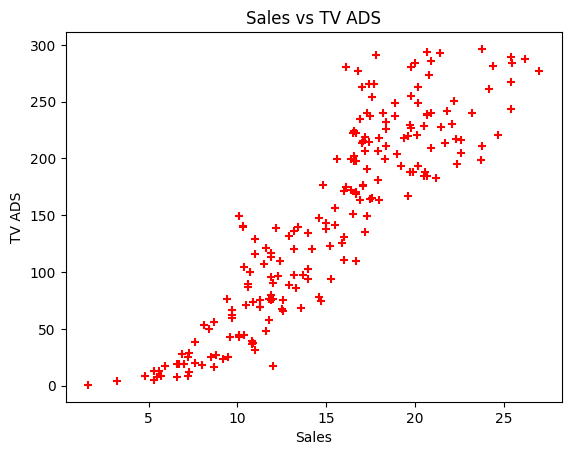

In [3]:
plt.xlabel("Sales")
plt.ylabel("TV ADS")
plt.title("Sales vs TV ADS")
plt.scatter(df['Sales'], df['TV'], color='red',marker = '+')
plt.show()

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [8]:
Y_prec = model.predict(X_test)

In [9]:
m_sq = mean_squared_error(Y_test, Y_prec)
r2 = r2_score(Y_test, Y_prec)
print(f"Mean Squared Error: {m_sq}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [10]:
print(f"TV Cofficient {model.coef_[0]}")
print(f"Radio Cofficient {model.coef_[1]}")
print(f"Newspaper Cofficient {model.coef_[2]}")
print(f"Intercept {model.intercept_}")

TV Cofficient 0.05450927083721978
Radio Cofficient 0.10094536239295579
Newspaper Cofficient 0.0043366468220340446
Intercept 4.714126402214127


Text(0.5, 0.92, '3D Plot of TV, Radio vs Sales')

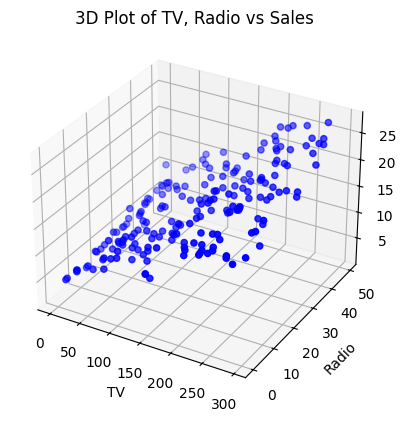

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TV'], df['Radio'], df['Sales'], c='b')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

ax.set_title('3D Plot of TV, Radio vs Sales')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, '3D Plot of TV, Radio vs Sales')

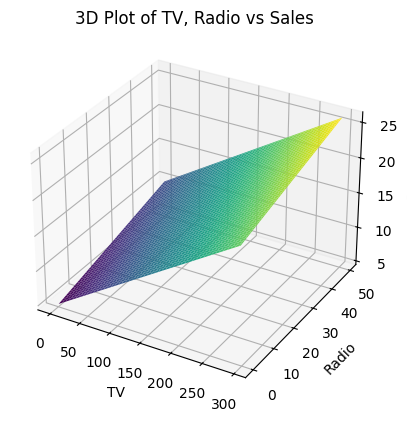

In [12]:
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 100)
radio_range = np.linspace(df['Radio'].min(), df['Radio'].max(), 100)

tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)


newspaper_mean = df['Newspaper'].mean()

sales_grid = model.predict(np.c_[tv_grid.ravel(), radio_grid.ravel(), np.full(tv_grid.ravel().shape, newspaper_mean)]).reshape(tv_grid.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.plot_surface(tv_grid, radio_grid, sales_grid, cmap='viridis', edgecolor='none')
ax.set_title('3D Plot of TV, Radio vs Sales')